# Assignment 2
Beltran, Tracey

**In this assignment, I observe a data set from the Los Angeles County Open Data website. The data set is titled Income, Poverty, and Living Wage. Before I upload the data set, I will import the necessary files needed to create a map of the poverty rates in Los Angeles County. Below I outline the steps I took to download the data set and then explore the file's information. I will look at the number of data set collected. I will ideally like to use the Income, Poverty, and Living Wage data set for my project. I will take the opportunity of this assignment to see if this information will be useful for my project and if the information I want to look at is going to make a good research topic.!** 


## Relevant Imports
- The operations below import the relevent information to help run codes with the data. I wanted to do this at the beginning of this notebook in case I forgot down the line. 
- I also upload the data file that I have imported into this folder under data. 

In [2]:
import geopandas as gpd

In [3]:
import fiona

In [4]:
import folium

In [5]:
poverty_rate = gpd.read_file('data/geo_export_7cfe3569-5203-4ce1-9f1a-3d74bfa9e15b.shp')

In [6]:
type(poverty_rate)

geopandas.geodataframe.GeoDataFrame

## Assessing the Data
>It took me a while to upload the data beause the first data file I wanted to upload was not correct. I decided to upload a data file I shared in week 1 and it worked! 

- Below I look at the first 10 rows in the data. What I am intereted in looking at is the povrate percentage.
- poverty_rate.shape shows me the number of columns and rows in the data


In [7]:
poverty_rate.head()

,aland,awater,countyfp,funcstat,geoid,geoid2,geoid2_1,intptlat,intptlon,mtfcc,name,namelsad,povrate,statefp,tractce,geometry
0,909972.0,0.0,037,S,06037204920,6.037205e+09,6.037205e+09,+34.0175004,-118.1974975,G5020,2049.20,Census Tract 2049.20,28.3,06,204920,"POLYGON ((-118.20284 34.01966, -118.20283 34.0..."
1,286962.0,0.0,037,S,06037205110,6.037205e+09,6.037205e+09,+34.0245059,-118.2142985,G5020,2051.10,Census Tract 2051.10,29.4,06,205110,"POLYGON ((-118.21964 34.02628, -118.21945 34.0..."
2,1270796.0,0.0,037,S,06037300501,6.037301e+09,6.037301e+09,+34.2206688,-118.2399756,G5020,3005.01,Census Tract 3005.01,6.3,06,300501,"POLYGON ((-118.24875 34.22249, -118.24875 34.2..."
3,1466129.0,0.0,037,S,06037205120,6.037205e+09,6.037205e+09,+34.0187546,-118.2117956,G5020,2051.20,Census Tract 2051.20,35.5,06,205120,"POLYGON ((-118.22023 34.02056, -118.22018 34.0..."
4,1418138.0,20551.0,037,S,06037206010,6.037206e+09,6.037206e+09,+34.0682177,-118.2320356,G5020,2060.10,Census Tract 2060.10,38.7,06,206010,"POLYGON ((-118.23924 34.06726, -118.23800 34.0..."


In [8]:
poverty_rate.shape

(2343, 16)

In [9]:
poverty_rate.info

<bound method DataFrame.info of           aland    awater countyfp funcstat        geoid        geoid2  \
0      909972.0       0.0      037        S  06037204920  6.037205e+09   
1      286962.0       0.0      037        S  06037205110  6.037205e+09   
2     1270796.0       0.0      037        S  06037300501  6.037301e+09   
3     1466129.0       0.0      037        S  06037205120  6.037205e+09   
4     1418138.0   20551.0      037        S  06037206010  6.037206e+09   
...         ...       ...      ...      ...          ...           ...   
2338  1400357.0       0.0      037        S  06037541700  6.037542e+09   
2339   808997.0       6.0      037        S  06037533603  6.037534e+09   
2340  5188936.0  220674.0      037        S  06037980015  6.037980e+09   
2341  3620352.0       0.0      037        S  06037262601  6.037263e+09   
2342  4579336.0   18657.0      037        S  06037300100  6.037300e+09   

          geoid2_1     intptlat      intptlon  mtfcc     name  \
0     6.037205

In [10]:
desired_columns = [['intptlat','intptlon','name','namelsad','povrate','geometry']]

In [11]:
poverty_rate[['intptlat','intptlon','name','namelsad','povrate','geometry']]

,intptlat,intptlon,name,namelsad,povrate,geometry
0,+34.0175004,-118.1974975,2049.20,Census Tract 2049.20,28.3,"POLYGON ((-118.20284 34.01966, -118.20283 34.0..."
1,+34.0245059,-118.2142985,2051.10,Census Tract 2051.10,29.4,"POLYGON ((-118.21964 34.02628, -118.21945 34.0..."
2,+34.2206688,-118.2399756,3005.01,Census Tract 3005.01,6.3,"POLYGON ((-118.24875 34.22249, -118.24875 34.2..."
3,+34.0187546,-118.2117956,2051.20,Census Tract 2051.20,35.5,"POLYGON ((-118.22023 34.02056, -118.22018 34.0..."
4,+34.0682177,-118.2320356,2060.10,Census Tract 2060.10,38.7,"POLYGON ((-118.23924 34.06726, -118.23800 34.0..."
...,...,...,...,...,...,...
2338,+33.9170526,-118.2033535,5417,Census Tract 5417,19.7,"POLYGON ((-118.20985 33.92506, -118.20579 33.9..."
2339,+33.9724728,-118.1950660,5336.03,Census Tract 5336.03,26.2,"POLYGON ((-118.20617 33.97632, -118.20610 33.9..."
2340,+33.7732472,-118.2888391,9800.15,Census Tract 9800.15,24.0,"POLYGON ((-118.31048 33.76685, -118.31023 33.7..."
2341,+34.0738344,-118.5557893,2626.01,Census Tract 2626.01,5.8,"POLYGON ((-118.57556 34.08019, -118.57497 34.0..."


## Cleaning the data
> I removed unnecssary columns from the data. I did this by createing a new label with only the desired columns. I then saved this a a new copy under poverty_rate_trimmed. 


In [12]:
desired_columns = ['intptlat',
                   'intptlon',
                   'name',
                   'namelsad',
                   'povrate',
                   'geometry']

In [13]:
poverty_rate[desired_columns]

,intptlat,intptlon,name,namelsad,povrate,geometry
0,+34.0175004,-118.1974975,2049.20,Census Tract 2049.20,28.3,"POLYGON ((-118.20284 34.01966, -118.20283 34.0..."
1,+34.0245059,-118.2142985,2051.10,Census Tract 2051.10,29.4,"POLYGON ((-118.21964 34.02628, -118.21945 34.0..."
2,+34.2206688,-118.2399756,3005.01,Census Tract 3005.01,6.3,"POLYGON ((-118.24875 34.22249, -118.24875 34.2..."
3,+34.0187546,-118.2117956,2051.20,Census Tract 2051.20,35.5,"POLYGON ((-118.22023 34.02056, -118.22018 34.0..."
4,+34.0682177,-118.2320356,2060.10,Census Tract 2060.10,38.7,"POLYGON ((-118.23924 34.06726, -118.23800 34.0..."
...,...,...,...,...,...,...
2338,+33.9170526,-118.2033535,5417,Census Tract 5417,19.7,"POLYGON ((-118.20985 33.92506, -118.20579 33.9..."
2339,+33.9724728,-118.1950660,5336.03,Census Tract 5336.03,26.2,"POLYGON ((-118.20617 33.97632, -118.20610 33.9..."
2340,+33.7732472,-118.2888391,9800.15,Census Tract 9800.15,24.0,"POLYGON ((-118.31048 33.76685, -118.31023 33.7..."
2341,+34.0738344,-118.5557893,2626.01,Census Tract 2626.01,5.8,"POLYGON ((-118.57556 34.08019, -118.57497 34.0..."


In [14]:
poverty_rate_trimmed = poverty_rate[desired_columns].copy()
poverty_rate_trimmed

,intptlat,intptlon,name,namelsad,povrate,geometry
0,+34.0175004,-118.1974975,2049.20,Census Tract 2049.20,28.3,"POLYGON ((-118.20284 34.01966, -118.20283 34.0..."
1,+34.0245059,-118.2142985,2051.10,Census Tract 2051.10,29.4,"POLYGON ((-118.21964 34.02628, -118.21945 34.0..."
2,+34.2206688,-118.2399756,3005.01,Census Tract 3005.01,6.3,"POLYGON ((-118.24875 34.22249, -118.24875 34.2..."
3,+34.0187546,-118.2117956,2051.20,Census Tract 2051.20,35.5,"POLYGON ((-118.22023 34.02056, -118.22018 34.0..."
4,+34.0682177,-118.2320356,2060.10,Census Tract 2060.10,38.7,"POLYGON ((-118.23924 34.06726, -118.23800 34.0..."
...,...,...,...,...,...,...
2338,+33.9170526,-118.2033535,5417,Census Tract 5417,19.7,"POLYGON ((-118.20985 33.92506, -118.20579 33.9..."
2339,+33.9724728,-118.1950660,5336.03,Census Tract 5336.03,26.2,"POLYGON ((-118.20617 33.97632, -118.20610 33.9..."
2340,+33.7732472,-118.2888391,9800.15,Census Tract 9800.15,24.0,"POLYGON ((-118.31048 33.76685, -118.31023 33.7..."
2341,+34.0738344,-118.5557893,2626.01,Census Tract 2626.01,5.8,"POLYGON ((-118.57556 34.08019, -118.57497 34.0..."


In [15]:
poverty_rate_trimmed.head()

,intptlat,intptlon,name,namelsad,povrate,geometry
0,+34.0175004,-118.1974975,2049.20,Census Tract 2049.20,28.3,"POLYGON ((-118.20284 34.01966, -118.20283 34.0..."
1,+34.0245059,-118.2142985,2051.10,Census Tract 2051.10,29.4,"POLYGON ((-118.21964 34.02628, -118.21945 34.0..."
2,+34.2206688,-118.2399756,3005.01,Census Tract 3005.01,6.3,"POLYGON ((-118.24875 34.22249, -118.24875 34.2..."
3,+34.0187546,-118.2117956,2051.20,Census Tract 2051.20,35.5,"POLYGON ((-118.22023 34.02056, -118.22018 34.0..."
4,+34.0682177,-118.2320356,2060.10,Census Tract 2060.10,38.7,"POLYGON ((-118.23924 34.06726, -118.23800 34.0..."


In [16]:
poverty_rate_trimmed.tail()

,intptlat,intptlon,name,namelsad,povrate,geometry
2338,+33.9170526,-118.2033535,5417,Census Tract 5417,19.7,"POLYGON ((-118.20985 33.92506, -118.20579 33.9..."
2339,+33.9724728,-118.1950660,5336.03,Census Tract 5336.03,26.2,"POLYGON ((-118.20617 33.97632, -118.20610 33.9..."
2340,+33.7732472,-118.2888391,9800.15,Census Tract 9800.15,24.0,"POLYGON ((-118.31048 33.76685, -118.31023 33.7..."
2341,+34.0738344,-118.5557893,2626.01,Census Tract 2626.01,5.8,"POLYGON ((-118.57556 34.08019, -118.57497 34.0..."
2342,+34.2442558,-118.2325716,3001,Census Tract 3001,4.3,"POLYGON ((-118.24860 34.23881, -118.24858 34.2..."


## Charts! 
> Below I ploted the data.
- There's a histgram, line, box, and pie chart of the poverty rate. 



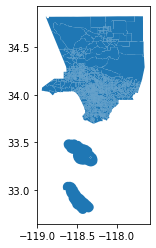

In [51]:
poverty_rate_trimmed.plot()

In [52]:
poverty_rate_trimmed.geometry

0       POLYGON ((-118.20284 34.01966, -118.20283 34.0...
1       POLYGON ((-118.21964 34.02628, -118.21945 34.0...
2       POLYGON ((-118.24875 34.22249, -118.24875 34.2...
3       POLYGON ((-118.22023 34.02056, -118.22018 34.0...
4       POLYGON ((-118.23924 34.06726, -118.23800 34.0...
                              ...                        
2338    POLYGON ((-118.20985 33.92506, -118.20579 33.9...
2339    POLYGON ((-118.20617 33.97632, -118.20610 33.9...
2340    POLYGON ((-118.31048 33.76685, -118.31023 33.7...
2341    POLYGON ((-118.57556 34.08019, -118.57497 34.0...
2342    POLYGON ((-118.24860 34.23881, -118.24858 34.2...
Name: geometry, Length: 2343, dtype: geometry

In [53]:
list (poverty_rate_trimmed)

['intptlat', 'intptlon', 'name', 'namelsad', 'povrate', 'geometry']

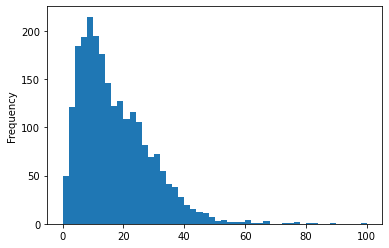

In [54]:
poverty_rate_trimmed['povrate'].plot.hist(bins=50)

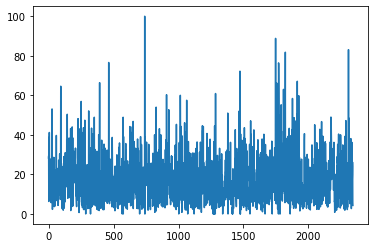

In [76]:
poverty_rate_trimmed['povrate'].plot.line (1000)

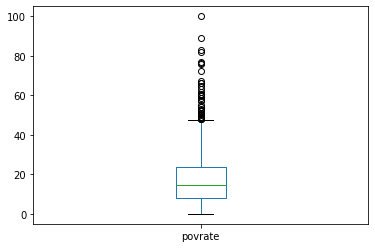

In [82]:
poverty_rate_trimmed['povrate'].plot.box (10)

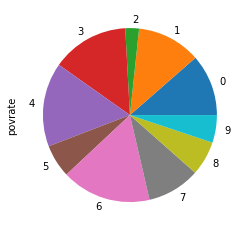

In [87]:
poverty_rate_trimmed['povrate'].head(10).plot.pie ()

In [34]:
import folium

In [91]:
m = folium.Map()
m

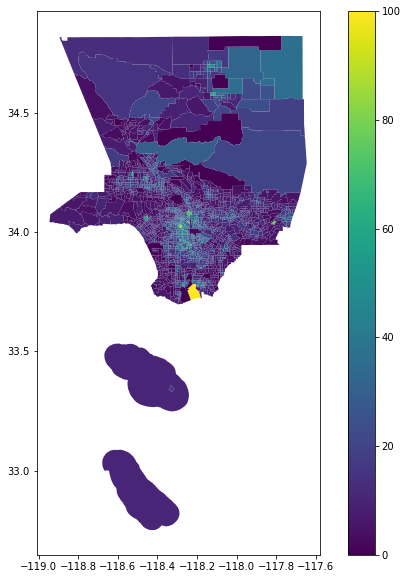

In [116]:
poverty_rate_trimmed.plot(
            figsize=(10,10),   
            column = 'povrate',   
            legend = True,                
                             
)             

In [117]:
m = folium.Map(location=[34.00158291566265, -118.25104531325], zoom_start=10)
m

In [112]:
mean = poverty_rate_trimmed.povrate.mean ()

In [114]:
mean

17.14635083226633

## Outcomes 
> The data file needed to be clean. unforunately the way the LAtitude and Longitude are added to the file, I couldn't add the data to the folium map. 